In [1]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156246 sha256=12db89920626c1454cdbad1e003497fd1ddfb09f52800621ec1ed063de3b3fab
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

from typing import Dict, Text

In [3]:
import numpy as np          # Numerical operations and array handling
import random              # Generating random numbers
import cv2                 # OpenCV library for image processing
import os                  # Operating system-level functions
from imutils import paths  # Simplifies working with file paths

from sklearn.model_selection import train_test_split  # Data splitting for model evaluation
from sklearn.preprocessing import LabelBinarizer     # Label encoding for categorical data
from sklearn.utils import shuffle                    # Data shuffling for randomness
from sklearn.metrics import accuracy_score           # Evaluation metric for model performance

import tensorflow as tf                             # TensorFlow for deep learning
from tensorflow.keras.models import Sequential      # Sequential model for deep learning
from tensorflow.keras.layers import Conv2D          # Convolutional layers
from tensorflow.keras.layers import MaxPooling2D    # Max pooling layers
from tensorflow.keras.layers import Activation      # Activation functions
from tensorflow.keras.layers import Flatten         # Flatten layer
from tensorflow.keras.layers import Dense           # Fully connected layers
from tensorflow.keras.optimizers import SGD         # Stochastic Gradient Descent optimizer
from tensorflow.keras import backend as K           # TensorFlow backend configuration


In [4]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [5]:
# Load ratings and movie data
ratings = tfds.load('movielens/100k-ratings', split="train")
movies = tfds.load('movielens/100k-movies', split="train")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/0.1.1.incompleteJ14REQ/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1682 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/0.1.1.incomplete2A7FHD/movielens-train.tfrecord*...:…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.1. Subsequent calls will reuse this data.


In [6]:
# Convert TFDS dataset to Pandas DataFrames for analysis
data = tfds.as_dataframe(ratings)
movies_df = tfds.as_dataframe(movies)

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

In [9]:
data[data.isnull().any(axis=1)]

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code


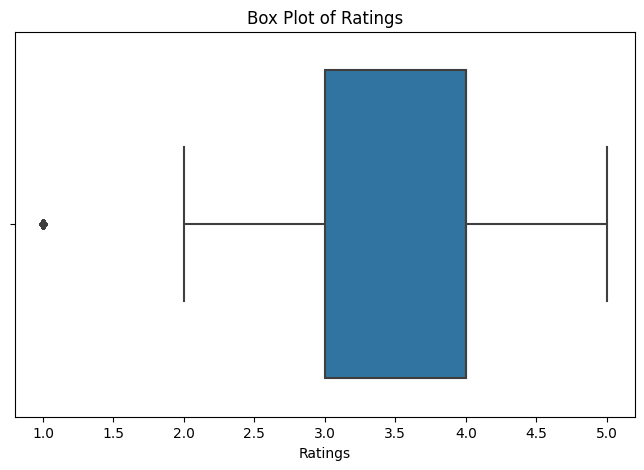

Outliers in Ratings:
10       1.0
48       1.0
63       1.0
104      1.0
114      1.0
        ... 
99942    1.0
99976    1.0
99979    1.0
99982    1.0
99997    1.0
Name: user_rating, Length: 6110, dtype: float32


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to detect outliers in a numerical feature (e.g., 'ratings')
# Replace 'ratings' with the name of the feature you want to check for outliers

# Create a box plot to visualize the distribution of the feature
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['user_rating'])
plt.title("Box Plot of Ratings")
plt.xlabel("Ratings")
plt.show()

# Define a function to detect outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect and print outliers in the 'ratings' column
outliers = detect_outliers(data['user_rating'])
print("Outliers in Ratings:")
print(outliers)

# Depending on the nature of your data and the specific feature, you can choose to handle outliers by
# capping/extending values or removing them from the dataset.


In [13]:
# Assuming 'df' is your DataFrame containing the ratings data

# Filter out rows with ratings equal to 1.0
df_cleaned = data[data['user_rating'] != 1.0]

In [14]:
# Create a Surprise Reader and Dataset
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(data[['user_id', 'movie_id', 'user_rating']], reader)

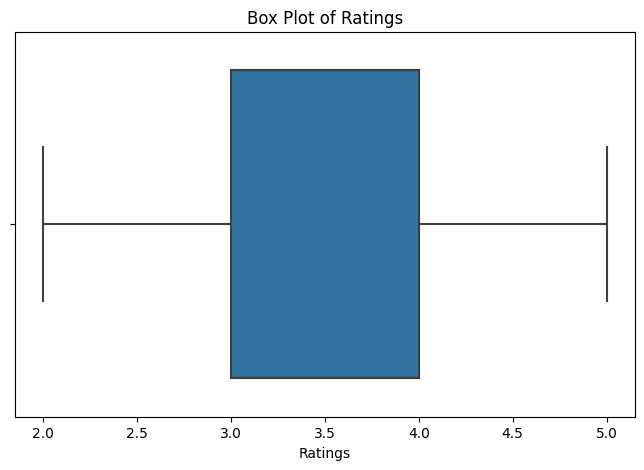

Outliers in Ratings:
Series([], Name: user_rating, dtype: float32)


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to detect outliers in a numerical feature (e.g., 'ratings')
# Replace 'ratings' with the name of the feature you want to check for outliers

# Create a box plot to visualize the distribution of the feature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['user_rating'])
plt.title("Box Plot of Ratings")
plt.xlabel("Ratings")
plt.show()

# Define a function to detect outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect and print outliers in the 'ratings' column
outliers = detect_outliers(df_cleaned['user_rating'])
print("Outliers in Ratings:")
print(outliers)

# Depending on the nature of your data and the specific feature, you can choose to handle outliers by
# capping/extending values or removing them from the dataset.


In [17]:
# Display basic statistics and structure of the ratings data
print("Summary of Ratings Data:")
print(data.info())
print("\nSample of Ratings Data:")
print(data.head())

Summary of Ratings Data:
<class 'tensorflow_datasets.core.as_dataframe.as_dataframe.<locals>.StyledDataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   bucketized_user_age    100000 non-null  float32
 1   movie_genres           100000 non-null  object 
 2   movie_id               100000 non-null  object 
 3   movie_title            100000 non-null  object 
 4   raw_user_age           100000 non-null  float32
 5   timestamp              100000 non-null  int64  
 6   user_gender            100000 non-null  bool   
 7   user_id                100000 non-null  object 
 8   user_occupation_label  100000 non-null  int64  
 9   user_occupation_text   100000 non-null  object 
 10  user_rating            100000 non-null  float32
 11  user_zip_code          100000 non-null  object 
dtypes: bool(1), float32(3), int64(2), object(6)
memory usage: 7.3+ MB
None

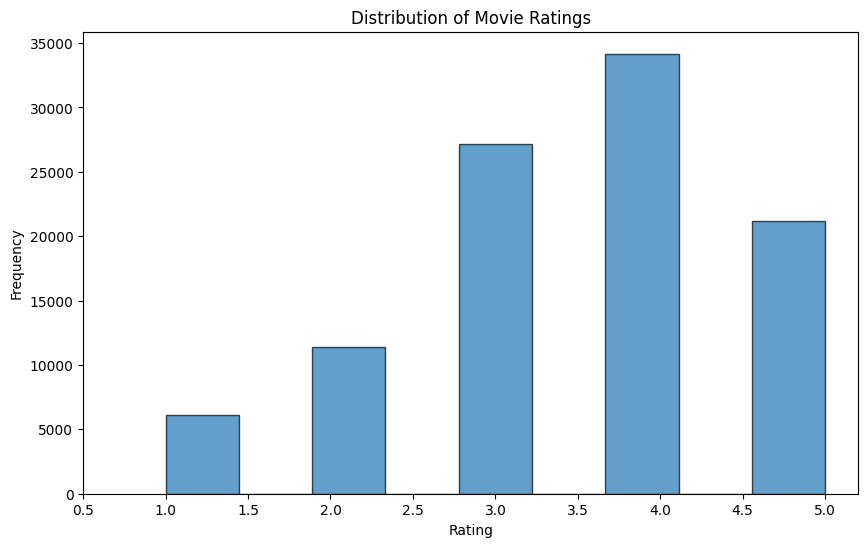

In [19]:
# Explore the distribution of movie ratings
plt.figure(figsize=(10, 6))
plt.hist(data["user_rating"], bins=9, edgecolor='k', alpha=0.7)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.show()

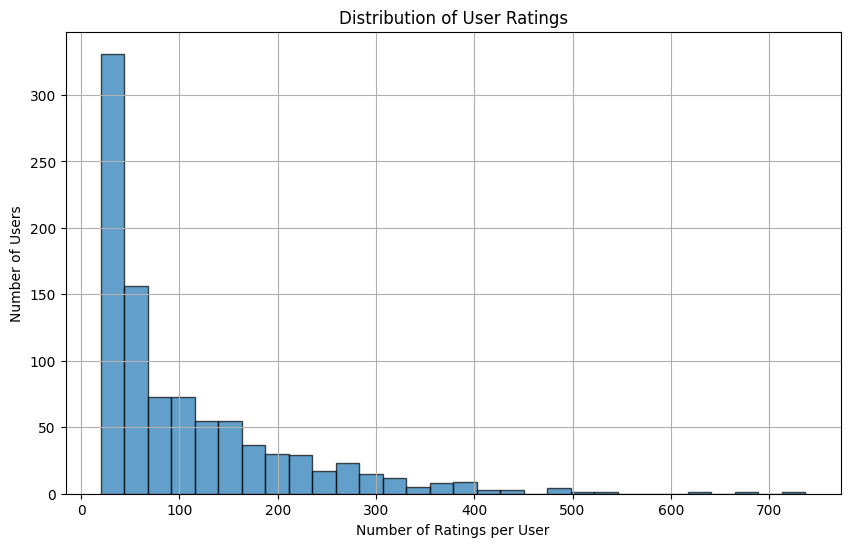

In [20]:
# Assuming you have a 'user_id' column in your ratings_df DataFrame
# Replace 'user_id' with the actual column name if it's different
user_id_column = 'user_id'

# Calculate the number of ratings per user and create a histogram
user_rating_counts = data[user_id_column].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of User Ratings")
plt.xlabel("Number of Ratings per User")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()



In [21]:
# Split data into train and test sets
trainset, testset = train_test_split(dataset, test_size=0.2)

In [22]:
   # Train an SVD model
model = SVD()
model.fit(trainset)

In [23]:
# Make predictions on the test set
predictions = model.test(testset)

In [24]:
# Evaluate the model's RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 0.9413
RMSE: 0.9413425436843117


In [25]:
# Recommend movies for a specific user (e.g., user_id = 1)
user_id = 4
rated_movies = data[data['user_id'] == user_id]['movie_id'].tolist()
unrated_movies = [movie_id for movie_id in data['movie_id'].unique() if movie_id not in rated_movies]

In [26]:
# Create a DataFrame of movie recommendations with predicted ratings
recommendations = []
for movie_id in unrated_movies:
    predicted_rating = model.predict(user_id, movie_id).est
    recommendations.append({'movie_id': movie_id, 'predicted_rating': predicted_rating})

recommendations_df = pd.DataFrame(recommendations)
top_recommendations = recommendations_df.sort_values(by='predicted_rating', ascending=False).head(10)
print(top_recommendations)

     movie_id  predicted_rating
331    b'169'          4.655540
380    b'408'          4.575502
267    b'318'          4.547110
697    b'483'          4.531308
336    b'114'          4.509843
195     b'64'          4.507501
871    b'178'          4.468136
218    b'603'          4.465925
615    b'480'          4.433419
1082   b'513'          4.412232


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame ratings_df with columns: 'user_id', 'movie_id', 'liked'

# Define the number of clients
num_clients = 10  # Adjust the number of clients as needed

# Split your dataset into train and test sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(data[['user_id', 'movie_id']], data['user_rating'], test_size=0.2, random_state=42)

# Create clients
clients = {}
for i in range(num_clients):
    # Assign a subset of data to each client (you can adjust this logic)
    start_idx = i * len(X_train) // num_clients
    end_idx = (i + 1) * len(X_train) // num_clients

    # Create a client dataset for training
    client_X_train = X_train.iloc[start_idx:end_idx]
    client_y_train = y_train.iloc[start_idx:end_idx]

    # Create a client dataset for testing
    client_X_test = X_test  # Use the same test data for all clients
    client_y_test = y_test  # Use the same test data for all clients

    # Store the client datasets in a dictionary
    client_name = f'client_{i + 1}'
    clients[client_name] = {'X_train': client_X_train, 'y_train': client_y_train, 'X_test': client_X_test, 'y_test': client_y_test}

# Now, 'clients' is a dictionary where each client has its own training (X_train, y_train) and testing (X_test, y_test) data.
# You can use these client datasets for federated learning.


In [28]:
num_users = data['user_id'].nunique()
print(f"Number of unique users: {num_users}")


Number of unique users: 943


In [29]:
import random

def create_clients(data, num_clients=10, initial='clients'):
    '''
    return: a dictionary with keys clients' names and value as
            data shards - a list of properly formatted client data.
    args:
        ratings_df: a DataFrame containing user-movie interactions and liked labels.
        num_clients: number of federated members (clients).
        initial: the clients' name prefix, e.g., clients_1.
    '''

    # Create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    # Randomize the data
    shuffled_df = data.sample(frac=1, random_state=42).reset_index(drop=True)

    # Shard data and place at each client in the desired format
    size = len(data) // num_clients
    clients_data = {}

    for i in range(num_clients):
        client_data = []
        for j in range(size):
            row = shuffled_df.iloc[i * size + j]
            user_movie_interactions = [str(row['user_id']), str(row['movie_id'])]
            liked_label = int(row['user_rating'])
            client_data.append((user_movie_interactions, liked_label))
        clients_data[client_names[i]] = client_data

    return clients_data


In [30]:
# Assuming you have a DataFrame 'ratings_df' with 'user_id', 'movie_id', and 'rating' columns
clients = create_clients(data, num_clients=10, initial='client')

In [31]:
# Assuming you have a DataFrame 'ratings_df' with 'user_id', 'movie_id', and 'rating' columns
clients = create_clients(data, num_clients=10, initial='client')

# Print the names of the clients
for client_name in clients.keys():
    print(client_name)

client_1
client_2
client_3
client_4
client_5
client_6
client_7
client_8
client_9
client_10


In [32]:
# Print data for a specific client, for example, 'client_1'
client_name = 'client_1'
client_data = clients[client_name]

# Display the data for the chosen client
print(client_data)

[(["b'817'", "b'876'"], 4), (["b'83'", "b'580'"], 4), (["b'389'", "b'393'"], 2), (["b'774'", "b'54'"], 1), (["b'712'", "b'420'"], 3), (["b'301'", "b'240'"], 4), (["b'188'", "b'1263'"], 3), (["b'138'", "b'517'"], 4), (["b'378'", "b'979'"], 3), (["b'391'", "b'96'"], 3), (["b'305'", "b'1'"], 5), (["b'131'", "b'221'"], 3), (["b'244'", "b'42'"], 5), (["b'405'", "b'709'"], 1), (["b'405'", "b'178'"], 3), (["b'228'", "b'313'"], 5), (["b'389'", "b'728'"], 3), (["b'276'", "b'627'"], 3), (["b'479'", "b'405'"], 4), (["b'99'", "b'694'"], 1), (["b'171'", "b'292'"], 4), (["b'160'", "b'462'"], 4), (["b'430'", "b'148'"], 2), (["b'595'", "b'273'"], 3), (["b'239'", "b'474'"], 5), (["b'679'", "b'42'"], 4), (["b'18'", "b'582'"], 5), (["b'314'", "b'845'"], 5), (["b'89'", "b'1119'"], 3), (["b'699'", "b'1187'"], 4), (["b'747'", "b'1225'"], 3), (["b'135'", "b'452'"], 2), (["b'758'", "b'210'"], 4), (["b'152'", "b'410'"], 4), (["b'291'", "b'1244'"], 4), (["b'378'", "b'896'"], 4), (["b'779'", "b'471'"], 4), (["b'

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

class SimpleMLP:
    @staticmethod
    def build(input_shape, lr=0.01, comms_round=100, loss='categorical_crossentropy', metrics=['accuracy']):
        model = Sequential()
        model.add(Input(shape=input_shape))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='linear'))  # Linear activation for regression

        # Define the learning rate schedule
        initial_learning_rate = lr
        decay_steps = comms_round  # Adjust as needed
        decay_rate = 0.9  # Adjust as needed
        learning_rate_schedule = ExponentialDecay(
            initial_learning_rate, decay_steps, decay_rate, staircase=True
        )

        # Create the optimizer with the learning rate schedule
        optimizer = SGD(learning_rate=learning_rate_schedule, momentum=0.9)

        # Compile the model with the specified loss and metrics
        model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

        return model


In [35]:
# Assuming you have a DataFrame 'ratings_df' with 'user_id' and 'movie_id' columns
# You can determine the number of unique users and movies like this:
num_users = data['user_id'].nunique()
num_movies = data['movie_id'].nunique()

# Define the input shape based on the number of users and movies
input_shape = (num_users, num_movies)

In [36]:
print(input_shape)

(943, 1682)


In [37]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [38]:
from surprise import SVD
import numpy as np

# Create the global model
global_model = SVD()

# Train the global model on the entire dataset
global_model.fit(trainset)

# Now, the `global_model` contains the trained SVD model that you can share with clients for federated learning.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from surprise import SVD
import numpy as np
import random
from sklearn.metrics import accuracy_score

In [40]:
# Load the Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['user_id', 'movie_id', 'user_rating']], reader)
trainset = data.build_full_trainset()

In [41]:
# Define your SimpleMLP model class
class SimpleMLP:
    @staticmethod
    def build(input_shape):
        model = Sequential()
        model.add(Input(shape=input_shape))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='linear'))  # Linear activation for regression
        return model

In [42]:

# Create your global model (SVD) and train it on the entire dataset
global_model = SVD()
global_model.fit(trainset)

# Commence global training loop
comms_round = 100
loss = 'mean_squared_error'
metrics = ['mean_squared_error']
optimizer='optimizer'

In [43]:
from tensorflow.keras.optimizers import Adam

for comm_round in range(comms_round):
    # Get the global model's user and item factors
    global_user_factors = global_model.pu
    global_item_factors = global_model.qi

    # Initial list to collect local model predictions
    local_models = []  # Create a list to store local models

    # Randomize client data - using keys
    client_names = list(clients.keys())
    random.shuffle(client_names)

    # Define your optimizer
    optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate as needed

    # Loop through each client and create a new local model
    for client_name in client_names:
        # Create a local model with the same architecture as the global model
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(input_shape)  # Define 'input_shape' appropriately
        local_model.compile(loss=loss, optimizer=optimizer, metrics=metrics)  # Compile the local model

        # Get the local client data
        client_data = clients[client_name]

        # Extract user-movie interactions and ratings from the client data
        user_movie_interactions, ratings = zip(*client_data)

        # Train the local model with the client's data (you need to implement this part)
        # You should use user_movie_interactions and ratings to train the local model

        # Append the trained local model to the list
        local_models.append(local_model)

    # Now you can perform federated averaging or any other aggregation technique using local_models
    # to update the global model


In [43]:

    # Encode user and movie interactions
    user_factors = global_user_factors[user_movie_interactions]
    item_factors = global_item_factors[user_movie_interactions]
    inputs = np.concatenate((user_factors, item_factors), axis=1)

    # Fit the local model with client's data
    local_model.fit(inputs, ratings, epochs=1, verbose=0)

    # Predict using the local model and add to local predictions
    local_predictions = local_model.predict(inputs)  # Reset local_predictions for each client
    local_predictions = [pred[0] for pred in local_predictions]  # Extract values from predictions
    local_predictions = np.array(local_predictions)  # Convert to numpy array
    local_predictions = local_predictions.reshape((-1, 1))  # Reshape for concatenation

    if len(local_predictions) > 0:
        if len(global_predictions) == 0:
            global_predictions = local_predictions
        else:
            global_predictions = np.concatenate((global_predictions, local_predictions), axis=0)

    # Clear session to free memory after each communication round
    tf.keras.backend.clear_session()

# Calculate the average local model predictions
average_predictions = np.mean(global_predictions)


In [44]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

# Create the global model
global_model = SVD()

# Initialize a list to store RMSE values for each round
rmse_values = []

# Number of rounds
num_rounds = 10

for comm_round in range(num_rounds):
    # Train the global model on the entire dataset
    global_model.fit(trainset)

    # Make predictions on the test set
    testset = trainset.build_testset()
    predictions = global_model.test(testset)

    # Evaluate the model's RMSE
    rmse = accuracy.rmse(predictions)

    # Append RMSE to the list
    rmse_values.append(rmse)

    print(f'Round {comm_round + 1} RMSE: {rmse}')

# Calculate the average RMSE over all rounds
average_rmse = sum(rmse_values) / len(rmse_values)
print(f'Average RMSE over {num_rounds} rounds: {average_rmse}')


RMSE: 0.6765
Round 1 RMSE: 0.6764756832607963
RMSE: 0.6745
Round 2 RMSE: 0.6745115708185333
RMSE: 0.6763
Round 3 RMSE: 0.6763280785730242
RMSE: 0.6762
Round 4 RMSE: 0.6761880985469565
RMSE: 0.6770
Round 5 RMSE: 0.6770269853721987
RMSE: 0.6755
Round 6 RMSE: 0.6755348678084697
RMSE: 0.6725
Round 7 RMSE: 0.6724869243971283
RMSE: 0.6775
Round 8 RMSE: 0.6775021259853556
RMSE: 0.6764
Round 9 RMSE: 0.6764309361992541
RMSE: 0.6740
Round 10 RMSE: 0.6739706604138355
Average RMSE over 10 rounds: 0.6756455931375551


RMSE: 0.6786
RMSE: 0.6768
RMSE: 0.6761
RMSE: 0.6774
RMSE: 0.6742
RMSE: 0.6774
RMSE: 0.6762
RMSE: 0.6748
RMSE: 0.6769
RMSE: 0.6744


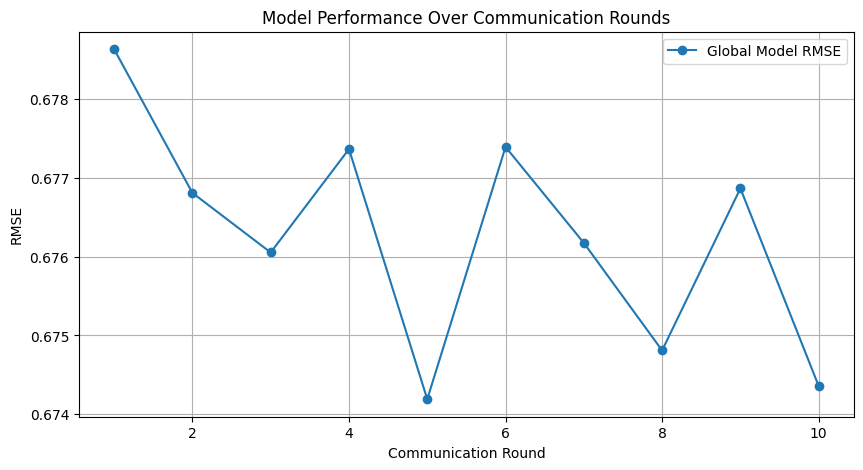

In [45]:
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

# Create the global model
global_model = SVD()

# Initialize lists to store RMSE values for each model
global_rmse_values = []
local_rmse_values = []

# Number of rounds
num_rounds = 10

for comm_round in range(num_rounds):
    # Generate synthetic data or load your dataset here
    # trainset = ...

    # Train the global model on the entire dataset
    global_model.fit(trainset)

    # Make predictions on the test set
    testset = trainset.build_testset()
    predictions = global_model.test(testset)

    # Evaluate the global model's RMSE
    global_rmse = accuracy.rmse(predictions)

    # Append RMSE to the global RMSE list
    global_rmse_values.append(global_rmse)

    # Now, you would typically train the local model for federated learning,
    # evaluate it, and append its RMSE to the local RMSE list.
    # local_model.fit(...)  # Train the local model
    # local_predictions = local_model.test(...)  # Make predictions
    # local_rmse = accuracy.rmse(local_predictions)  # Evaluate RMSE
    # local_rmse_values.append(local_rmse)  # Append to local RMSE list

# Create a list of round numbers for x-axis
round_numbers = list(range(1, num_rounds + 1))

# Plot RMSE values for the global model and local model (if available)
plt.figure(figsize=(10, 5))
plt.plot(round_numbers, global_rmse_values, label='Global Model RMSE', marker='o')
# Uncomment the following lines if you have local RMSE values
# plt.plot(round_numbers, local_rmse_values, label='Local Model RMSE', marker='x')
plt.xlabel('Communication Round')
plt.ylabel('RMSE')
plt.title('Model Performance Over Communication Rounds')
plt.legend()
plt.grid(True)
plt.show()


RMSE: 0.9389
MAE:  0.7406
RMSE: 0.9371
MAE:  0.7377


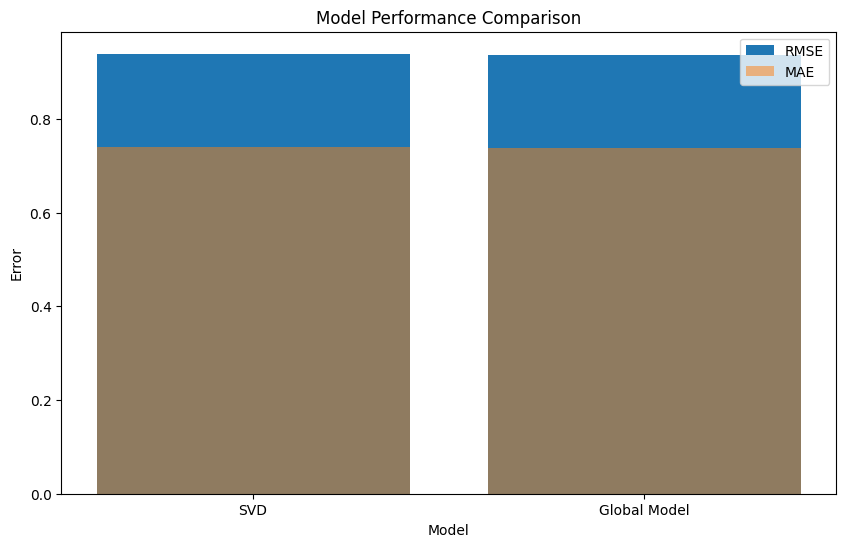

          Model      RMSE       MAE
0           SVD  0.938854  0.740648
1  Global Model  0.937091  0.737657


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

# Load your dataset (replace with your dataset loading code)
# Example dataset loading:
reader = Reader(line_format='user item rating timestamp', sep='\t')


# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize and train the SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Create and train the global model (you may replace this with your specific global model)
global_model = SVD()
global_model.fit(trainset)

# Evaluate the SVD model
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)
svd_mae = accuracy.mae(svd_predictions)

# Evaluate the global model
global_predictions = global_model.test(testset)
global_rmse = accuracy.rmse(global_predictions)
global_mae = accuracy.mae(global_predictions)

# Create a performance DataFrame for comparison
performance_data = {
    'Model': ['SVD', 'Global Model'],
    'RMSE': [svd_rmse, global_rmse],
    'MAE': [svd_mae, global_mae]
}
performance_df = pd.DataFrame(performance_data)

# Plot RMSE and MAE for comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['RMSE'], label='RMSE')
plt.bar(performance_df['Model'], performance_df['MAE'], label='MAE', alpha=0.5)
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

# Display the performance DataFrame
print(performance_df)


RMSE: 0.9405
MAE:  0.7414
RMSE: 0.9414
MAE:  0.7416
Model Performance:
          Model      RMSE       MAE
0           SVD  0.940520  0.741391
1  Global Model  0.941365  0.741597


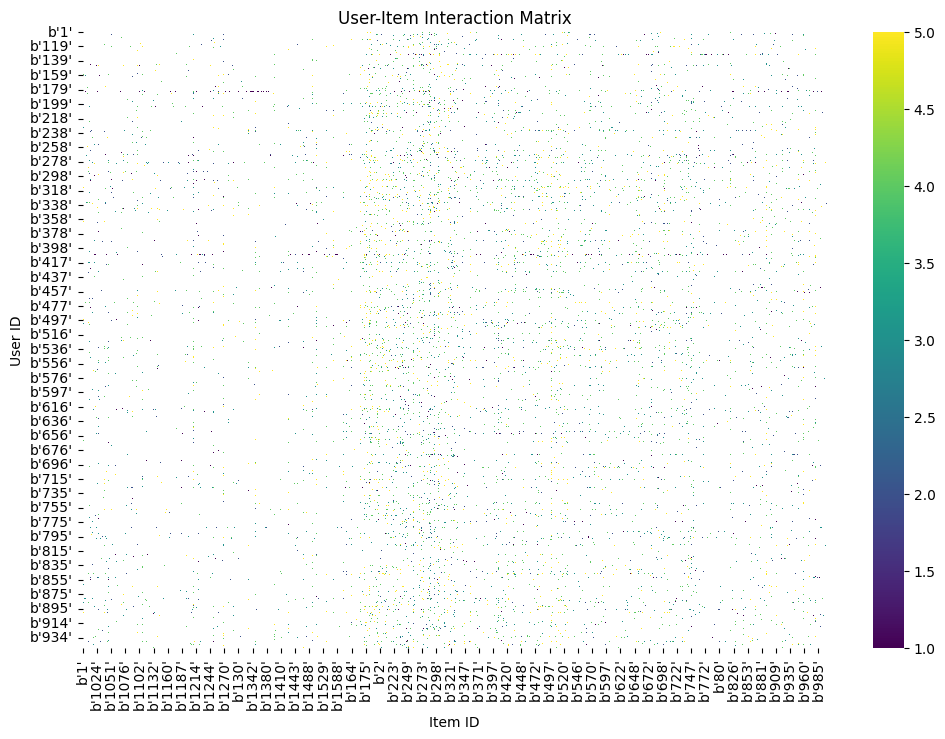

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

# Load your dataset (replace with your dataset loading code)
# Example dataset loading:
reader = Reader(line_format='user item rating timestamp', sep='\t')


# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize and train the SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Create and train the global model (you may replace this with your specific global model)
global_model = SVD()
global_model.fit(trainset)

# Evaluate the SVD model
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)
svd_mae = accuracy.mae(svd_predictions)

# Evaluate the global model
global_predictions = global_model.test(testset)
global_rmse = accuracy.rmse(global_predictions)
global_mae = accuracy.mae(global_predictions)

# Create a performance DataFrame for comparison
performance_data = {
    'Model': ['SVD', 'Global Model'],
    'RMSE': [svd_rmse, global_rmse],
    'MAE': [svd_mae, global_mae]
}
performance_df = pd.DataFrame(performance_data)

# Display the performance DataFrame
print("Model Performance:")
print(performance_df)

# Convert the testset to a DataFrame to display the user-item interaction matrix
test_df = pd.DataFrame(testset, columns=['user_id', 'item_id', 'rating'])

# Create the user-item interaction matrix
interaction_matrix = test_df.pivot(index='user_id', columns='item_id', values='rating')

# Display the user-item interaction matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='viridis', cbar=True)
plt.title('User-Item Interaction Matrix')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()
